In [72]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
tf.__version__

'2.0.0'

In [3]:
keras.__version__

'2.2.4-tf'

# Building an Image Classifier Using the Sequential API

## Using Keras to load the dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [15]:
X_train_full.dtype

dtype('uint8')

Taking a parte to validation set. Also normalizing the pixel to 0-1 range.

In [30]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [31]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [32]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [34]:
class_names[y_train[0]]

'Coat'

## Creating the model using the Sequential API

In [35]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Another way

In [49]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.layers

In [53]:
hidden1 = model.layers[1]
model.get_layer('dense_9') is hidden1

True

In [55]:
weights, biases = hidden1.get_weights()

In [62]:
weights

array([[-0.05781403,  0.03367597, -0.02224809, ..., -0.06390106,
        -0.00466117,  0.04802144],
       [ 0.00125515, -0.0198766 , -0.02820581, ..., -0.03645196,
         0.01985449,  0.06997323],
       [-0.07333363, -0.00299358,  0.0263066 , ..., -0.05915081,
         0.04056154, -0.07158201],
       ...,
       [ 0.02114813,  0.01765314,  0.06221335, ..., -0.04891063,
         0.02107403, -0.00132336],
       [ 0.07381491,  0.06080593, -0.06312165, ...,  0.05169572,
        -0.0597917 ,  0.01075826],
       [-0.0254573 , -0.02154787, -0.0206268 , ...,  0.00725967,
         0.00664902,  0.04516377]], dtype=float32)

In [59]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [63]:
weights.shape, biases.shape

((784, 300), (300,))

## Compiling the model

In [64]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## Training and evaluating the model

In [65]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 16s 291us/sample - loss: 0.7252 - accuracy: 0.7628 - val_loss: 0.5058 - val_accuracy: 0.8304
Epoch 2/30
55000/55000 [==============================] - 21s 390us/sample - loss: 0.4902 - accuracy: 0.8297 - val_loss: 0.4405 - val_accuracy: 0.8494
Epoch 3/30
55000/55000 [==============================] - 22s 406us/sample - loss: 0.4446 - accuracy: 0.8443 - val_loss: 0.4144 - val_accuracy: 0.8598
Epoch 4/30
55000/55000 [==============================] - 17s 304us/sample - loss: 0.4147 - accuracy: 0.8542 - val_loss: 0.4262 - val_accuracy: 0.8476
Epoch 5/30
55000/55000 [==============================] - 15s 275us/sample - loss: 0.3944 - accuracy: 0.8611 - val_loss: 0.3733 - val_accuracy: 0.8702
Epoch 6/30
55000/55000 [==============================] - 22s 406us/sample - loss: 0.3771 - accuracy: 0.8669 - val_loss: 0.3724 - val_accuracy: 0.8692
Epoch 7/30
55000/55000 [=====================

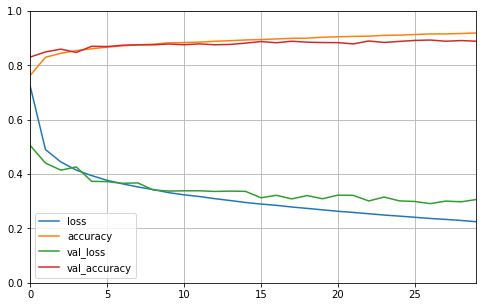

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [69]:
X_new = X_test_full[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [73]:
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [74]:
np.array(class_names)[y_test_full[:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

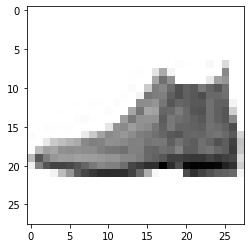

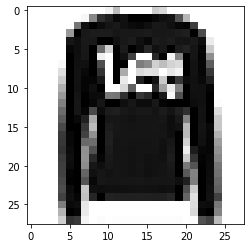

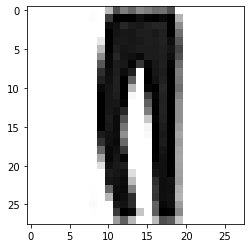

In [87]:
plt.imshow(X_test_full[0], cmap='gray_r')
plt.show()

plt.imshow(X_test_full[1], cmap='gray_r')
plt.show()

plt.imshow(X_test_full[2], cmap='gray_r')
plt.show()